# Imports

In [1]:
# Style overrides
from IPython.core.display import HTML
css = open("../QA/overrides.css", "r").readlines()
css = "".join(css)
css = f"<style>{css}</style>"
#HTML(css)

In [2]:
# Auto reload imports
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import os
os.environ['LD_LIBRARY_PATH'] = '/opt/conda/lib/'

In [5]:
import matplotlib.pyplot as plt
import cv2
from transformers import YolosConfig, YolosModel
from IPython.display import Image, display
%matplotlib inline


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA SETUP: CUDA runtime path found: /opt/conda/lib/libcudart.so.11.0
CUDA SETUP: Highest compute capability among GPUs detected: 8.6
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cuda118.so...


In [6]:
def grab_frame():
    cap = cv2.VideoCapture('rtsp://admin:@192.168.1.104')
    ret, frame = cap.read()
    cap.release()
    return frame

In [7]:
from watcher import Watcher

In [8]:
import logging
#logger = logging.Logger("Watcher")
#logger.setLevel("DEBUG")
logging.basicConfig(
     #filename='DockProc.log',
     level=logging.INFO, 
     format= '[%(asctime)s] {%(pathname)s:%(lineno)d} %(levelname)s - %(message)s',
     datefmt='%H:%M:%S'
 )
watcher = Watcher(pre_init=True)

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [9]:
frame = grab_frame()

In [10]:
frame

array([[[ 2,  5,  5],
        [ 2,  5,  5],
        [ 2,  5,  5],
        ...,
        [13, 11, 16],
        [13, 11, 16],
        [13, 11, 16]],

       [[ 2,  5,  5],
        [ 2,  5,  5],
        [ 2,  5,  5],
        ...,
        [13, 11, 16],
        [13, 11, 16],
        [13, 11, 16]],

       [[ 2,  5,  5],
        [ 2,  5,  5],
        [ 2,  5,  5],
        ...,
        [13, 11, 16],
        [13, 11, 16],
        [13, 11, 16]],

       ...,

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [ 1,  4,  4],
        [ 1,  4,  4],
        [ 1,  4,  4]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]],

       [[ 3,  3,  3],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [ 4,  4,  4],
        [ 4,  4,  4],
        [ 4,  4,  4]]], dtype=uint8)

In [11]:
from transformers import AutoImageProcessor, AutoModelForObjectDetection
import torch
from PIL import Image
import requests

[18:37:48] {/py/watcher/watcher.py:130} INFO - Watcher.get_text_summary(): Executed in 0.9882s. Used 0.1 GB of memory.


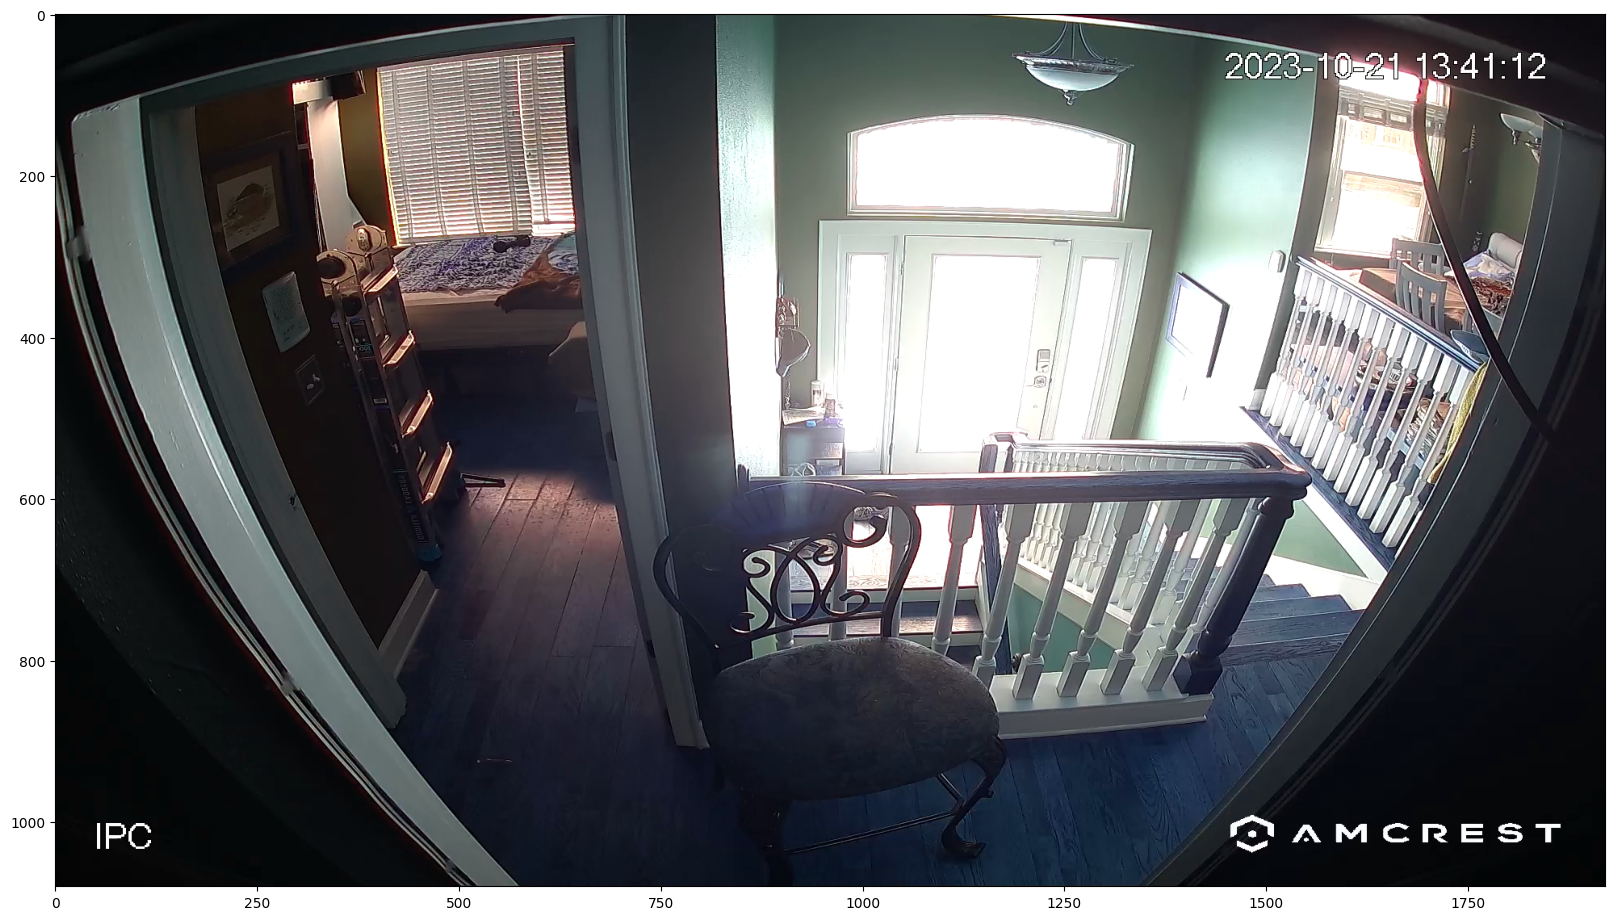

In [12]:
frame = grab_frame()
objects = watcher.get_objects(frame, is_profile=True)
frame = watcher.overlay_boxes(objects, frame)
plt.figure(figsize=(20,20))
plt.imshow(frame)

In [18]:



import cv2
# TODO: Move cam creds to env
cap = cv2.VideoCapture('rtsp://admin:@192.168.1.104')


frame_width = int(cap.get(3)) 
frame_height = int(cap.get(4)) 
   
size = (frame_width, frame_height) 


out = cv2.VideoWriter('filename_1.avi',  
                         cv2.VideoWriter_fourcc(*'MJPG'), 
                         15, size) 

update_step = 7
current_step = 0

while(True):
    current_step += 1
    try:
        ret, frame = cap.read()
        
        if current_step % update_step == 0:
            objects = watcher.get_objects(frame)
            
        frame = watcher.overlay_boxes(objects, frame)
        
        #cv2.imshow('frame',frame)
        out.write(frame) 
    except:
        cap.release()
        out.release()
        cv2.destroyAllWindows()
    if cv2.waitKey(1) & 0xFF == ord('q') or not ret:
        cv2.destroyAllWindows()
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [14]:
frame